## **Algerian Forest Fires Dataset**

#### 1. **UNDERSTANDING THE GIVEN TASK**

#### Task Given by instructor Krish Naik

* Solve in ipynb:

    1. Import the dataset.
https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++#
    
    2. Do proper EDA(analysis) of your dataset and create a report

    3. Then perform necessary preprocessing steps


#### 2. **DATA COLLECTION AND UNDERSTANDING**

* I used a dataset on **Algerian Forest Fires** from UCI. The dataset contains a culmination of forest fire observations and data in two regions of Algeria: the Bejaia region and the Sidi Bel-Abbes region. The timeline of this dataset is from **June 2012 to September 2012**. In this project, we focused on whether certain weather features could predict forest fires in these regions using few Classification algorithms.


* As per the Task given i choose regression problem to predict fire weather index

#### 3. **DATA EXPLORATION**

* In this step, we will apply Exploratory Data Analysis (EDA) to extract insights from the data set to know which features have contributed more in predicting Forest fire by performing Data Analysis using Pandas and Data visualization using Matplotlib & Seaborn. It is always a good practice to understand the data first and try to gather as many insights from it.

    -   Below are tasks to be performed in EDA:

        1. **Importing Libraries**

        2. **Data Cleaning for EDA Report**

        3. **Exploratory Data Analysis (EDA) on all Features**


#### **Importig Libraries and Reading the Dataset :-**

In [35]:
# Importing Libraries 
import pandas as pd
import re
import calendar
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import io


# Read the Dataset using pandas
dataset =  pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=[0])
# Display frist 5 data of the dataset as a sample 
display(dataset.head())

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### **Shape, Missing Value, Duplicates Value and Summary of Dataset :-**

In [36]:
## Check Shape
dataset_shape = dataset.shape
print(f"Shape (Rows, Column) :- {dataset_shape}")

## Check Missing Value
# Columns which has null values
dataset_missing_value = dataset[dataset.isnull().any(axis=1)]
print("\nMissing Values (Column wise) :-")
display(dataset_missing_value)

## Check Duplicates
dataset_duplicates = dataset.duplicated().sum()
print(f"\nNumber of duplicates :- {dataset_duplicates}")

## Check Summary
# Capture the output of df.info() as a string
summary_buffer = io.StringIO()
dataset.info(buf=summary_buffer)
dataset_summary_str = summary_buffer.getvalue()
# Close the buffer
summary_buffer.close()
# Now, output_str contains the info() output as a string
print("\nSummary :-\n")
print(dataset_summary_str)

## Check Mis-Spaced
mis_spaced_columns = [col for col in dataset.columns if ' ' in col]

if mis_spaced_columns:
    print("\nMis-spaced column names :-")
    for col in mis_spaced_columns:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")

Shape (Rows, Column) :- (246, 14)

Missing Values (Column wise) :-


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN



Number of duplicates :- 0

Summary :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Mis-spaced column names :-
' RH'
' Ws'
'Rain '
'Classes  '


#### **`Insights` :-**

-	Based on Shape of Dataset :

	-	Total number of rows in the dataset - 246
	
	-	Total number of columns in the dataset - 14

-	Based on Missing Value of the Dataset :

	-	['day'] having 0 Null Value

	-	['month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] having 1 Null Value

	-	['Classes  '] having 2 Null Value

-	Based on Duplicates of the Dataset :

	-	There are 0 duplicates values in the dataset

-	Based on Summary of the Dataset :

	-	RangeIndex - 0 to 245

	-	dtypes - object

	-	Memory Usage - 27.0+ KB

-   Based on Mis-spaced column name of Dataset :

    -    [' RH', ' Ws', 'Rain ', 'Classes  '] having Mis-Spaced

#### **Adding, Cleaning, Fix Mis-Spaced and Changing DataType of the Dataset :-**

-  **`Step 01`.  Adding Column Based on "Region" :**

    -  **As we noticed The dataset is Divided into two sets based on Region -**

        1. **`'Bejaia Region Dataset'` lies between (0 to 122)th Index**

        2. **`'Sidi-Bel Abbes Region Dataset'` lies between (122 to 246)th Index**

            -    `So`, We have to make a new column based on the Region (by assigning them (0 and 1) rank respectively) before Cleaning the Dataset.

In [37]:
## Add Column named "Region"

# Assigning them rank 
Bejaia_Region_Dataset = 1
Sidi_Bel_Abbes_Region_Dataset = 2

dataset.loc[0:122,'Region']=Bejaia_Region_Dataset
dataset.loc[122:,'Region']=Sidi_Bel_Abbes_Region_Dataset

-  **`Step 02`.  Romoving Rows having Null or na Values :**


In [38]:
## Remove null or na values rows
dataset = dataset.dropna().reset_index(drop=True)

-  **`Step 03`. Removing Rows String Values :**

    -  **As We Noticed that Rows 122th having a String Values.**

        -  `So`, We will remove this row from the data set as it is not required for our analysis and also to avoid any error in further processings

In [39]:
## Remove 122th column
dataset = dataset.drop(122).reset_index(drop=True)

-  **`Step 04`. Fixing Column name String Values :**

    -  **As We Noticed, There are 4 Mis-Spaced Column names.**

        -  `So`, We have to fix the Mis-Spaced Column's name.

In [40]:
## Fix Mis-Spaced column names
dataset.columns = dataset.columns.str.strip()

-  **`Step 05`. Changeing DataType on the Column :**

    -  **['month', 'day', 'year', 'Temperature','RH', 'Ws','Region'] as Integer**

    -  **['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] as Float**

In [41]:
dataset[['month', 'day', 'year', 'Temperature','RH', 'Ws','Region']] = dataset[['month', 'day', 'year', 'Temperature','RH', 'Ws', 'Region']].astype(int)

objects = [features for features in dataset.columns if dataset[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        dataset[i] = dataset[i].astype(float)

#### **`Finaly`, Check the Summary or Descriptive Summary of the DataType :-**

In [42]:
## Final Summary
# Capture the output of df.info() as a string
Final_summary_buffer = io.StringIO()
dataset.info(buf=Final_summary_buffer)
Final_dataset_summary_str = Final_summary_buffer.getvalue()
# Close the buffer
Final_summary_buffer.close()
# Now, output_str contains the info() output as a string
print("Final Summary :-\n")
print(Final_dataset_summary_str)

## Final Descriptive Summary
dataset_descriptive_summary = dataset.describe().T
print("\nFinal Descriptive Summary :-\n")
display(dataset_descriptive_summary)

Final Summary :-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


Final Descriptive Summary :-



,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


#### **`Insights` :-**

-	Based on Descriptive Summary of Dataset :

1.	Temperature -

	-	Mean value = Approx 32.15°C
	-	Standard Deviation = It has Relatively low standard deviation 3.63,That indicates the temperature data is clustered around the mean.

	-	Minimum Temperature recorded = 22.0°C
	
	-	Maximum temperature recorded = 42.0°C

2.	Mean value of Relative Humidity (RH) - Approx 62.04%

3.	Mean value of Wind Speed (Ws) - Approx 15.49 km/h

4.	Rain -

	-	Mean value = Approx 0.76 mm

	-	Rainfall range = 0.00 mm (minimum) to 16.80 mm (maximum).

5.	Stadard Deviation of Drought Code (DC) - It has a high standard deviation 47.67, That indicates a wider spread of values.

-	Fire Weather Conditions, Based on domain knowledge and the names of the columns - 

	1. **FFMC (Fine Fuel Moisture Code)**: FFMC is a numerical rating of the moisture content of litter and other cured fine fuels. It is a key indicator of the flammability of fine fuels and plays a crucial role in assessing fire danger.

	2. **DMC (Duff Moisture Code)**: DMC represents the moisture content of decomposed organic matter beneath the litter layer. Dry duff can contribute to fire spread, so monitoring its moisture content is important in fire weather assessments.

	3. **ISI (Initial Spread Index)**: ISI quantifies the expected rate of fire spread immediately upon ignition. It takes into account factors such as wind speed, fine fuel moisture, and temperature. A higher ISI value indicates a greater potential for rapid fire spread.

	4. **BUI (Buildup Index)**: BUI is an index that combines FFMC and DMC to assess the overall buildup of fuels in a forest environment. It provides insight into the potential for a fire to transition from the surface to the crown of trees.

	5. **FWI (Fire Weather Index)**: FWI is a composite index that integrates various fire weather components, including FFMC, DMC, ISI, and BUI, along with wind speed. It provides an overall assessment of fire danger and is widely used in fire management.

#### **Cleaning the Data of targeted Column :-**

-  **`Step 01`. Check Unique values of targeted Column :**

In [43]:
dataset['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

**`NOTE` - It Looks like the values were misspaced so we can use str.strip() method**

-  **`Step 02`. Check Mis-Spaced values of targeted Column :**

In [44]:
## Check Mis-Spaced
mis_spaced_value = [col for col in dataset['Classes'].unique() if ' ' in col]

if mis_spaced_value:
    print("\nMis-spaced column names :-")
    for col in mis_spaced_value:
        print(f"'{col}'")
else:
    print("\nNo mis-spaced column names found.")


Mis-spaced column names :-
'not fire   '
'fire   '
'fire '
'not fire'
'not fire '
'not fire     '
'not fire    '


-  **`Step 03`. Fix the Values of the Classes column of the Dataset :**

    -  **As We Notic from the frist step of the cleaning the Data of targetet Column, There are 7 Mis-Spaced Values Classes column.**

        -  `So`, We have to fix the Mis-Spaced Values of Classes column.	

In [45]:
## Fix Mis-Spaced column names
dataset['Classes'] = dataset['Classes'].str.strip()

#### **Lets, See `'Bejaia Region Dataset'` :-**

In [46]:
dataset[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


#### **Lets, See `'Sidi-Bel Abbes Region Dataset'` :-**

In [47]:
dataset[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


#### **Now, Save this Cleaned and Fixed Dataset :-**

In [48]:
dataset.to_csv('Algerian_forest_fires_dataset_CLEANED.csv', index=False)

## **Exploratory Data Analysis (`EDA`)**

$$Encoding\ Not\ fire\ as\ 0\ and\ Fire\ 1$$

In [49]:
# Encoding Not fire as 0 and Fire as 1
dataset['Classes']= np.where(dataset['Classes']== 'not fire',0,1)

#### **`01`. Histplot :**

-  **Define Histplot function for plotting Histplot all the Features**

In [50]:
def histplot():
    num_rows = 5
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))
    axes = axes.flatten()
    for i, x in enumerate(dataset.columns):
        ax = axes[i]
        sns.histplot(data=dataset[x], kde=True, ax=ax)
        ax.set_title(x)
        ax.set_xlabel(x)
        ax.set_ylabel(f"Frequency of {x}")
    plt.tight_layout()
    plt.show()

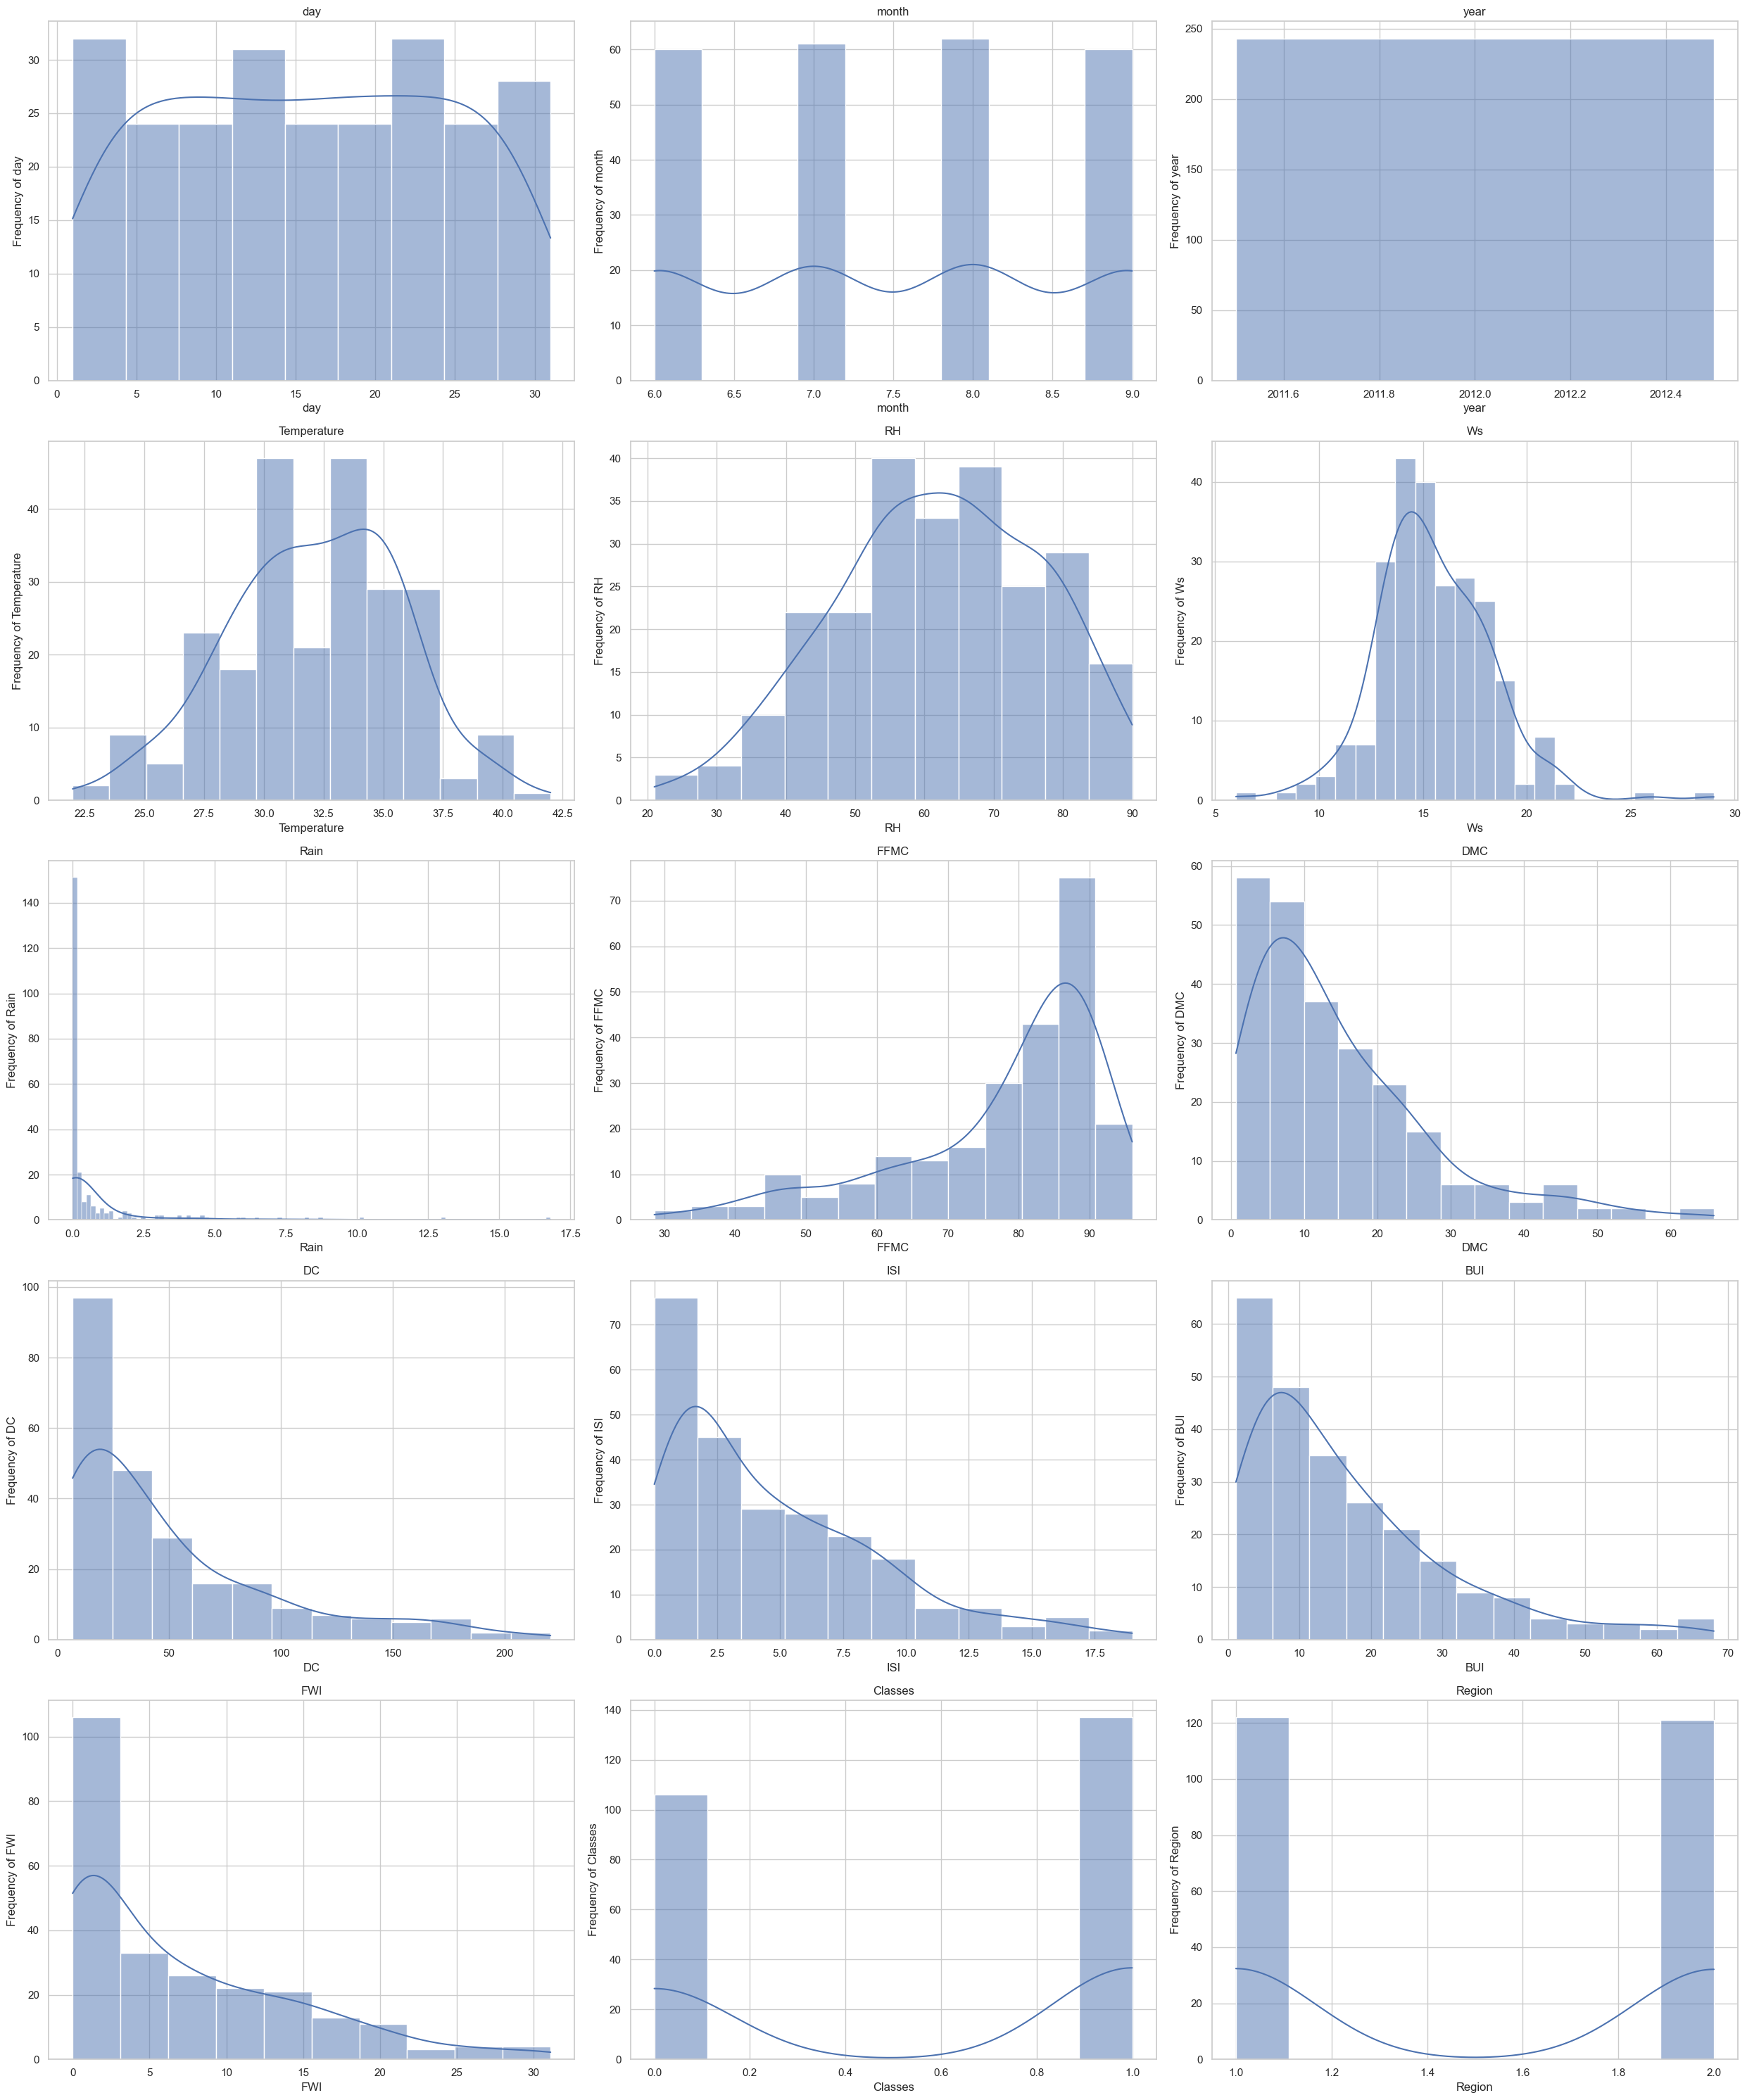

In [51]:
histplot()

#### **`02`. Pie-Charts :**

-  **`Step 01`. Calculate Percentage distribuation :**

In [52]:
# Percentage for PieChart
percentage = dataset['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

-  **`Step 02`. Ploting Pie-Chart :**

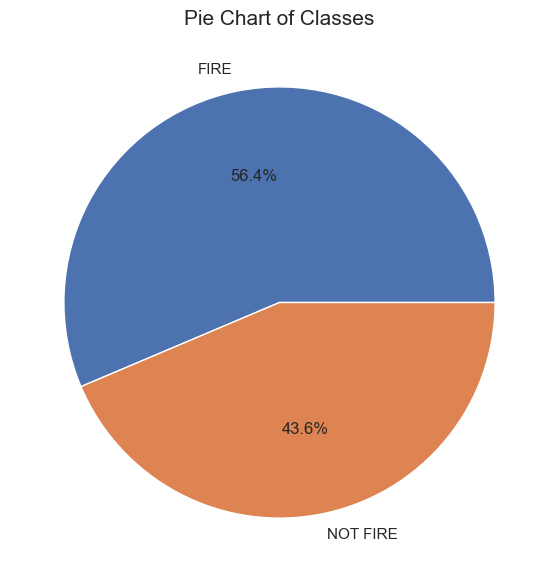

In [53]:
#plotting PieChart
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

#### **`03`. Correlation Heatmap Plot :**


Correlation Heatmap Plot :-


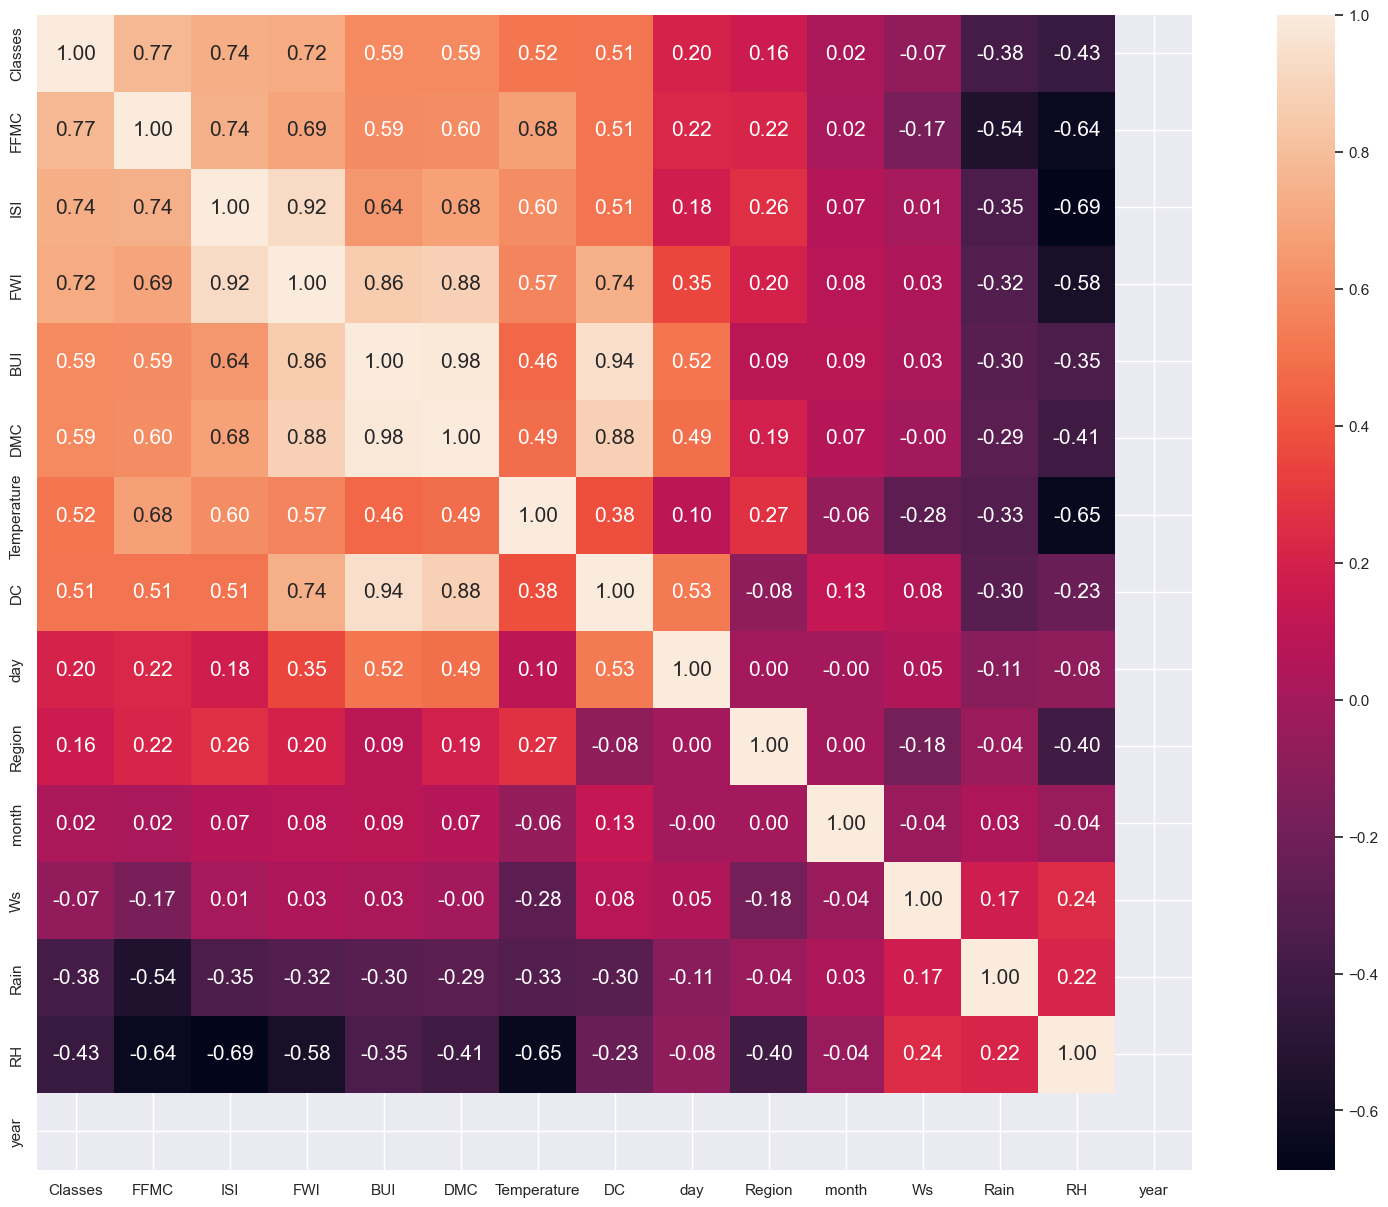

In [54]:
corr = dataset.corr()  # Calculate the correlation matrix

# Sort columns by correlation with 'Classes'
No_of_column = len(dataset.columns)
Largest_correlations_column = corr.nlargest(No_of_column, 'Classes')['Classes'].index

# Calculate the correlation matrix of the selected columns
cm = np.corrcoef(dataset[Largest_correlations_column].values.T)

print("\nCorrelation Heatmap Plot :-")
# Create the heatmap
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(22, 15))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=Largest_correlations_column.values, xticklabels=Largest_correlations_column.values)
plt.show()

#### **`04`. Boxplot :**

-  **Algerian Forest Fire Weather Index (FWI) System.**

    -   This can be considered for Regression problem

Median: 4.2
Q1 (25th percentile): 0.7
Q3 (75th percentile): 11.45
IQR (Interquartile Range): 10.75
Number of Outliers: 4


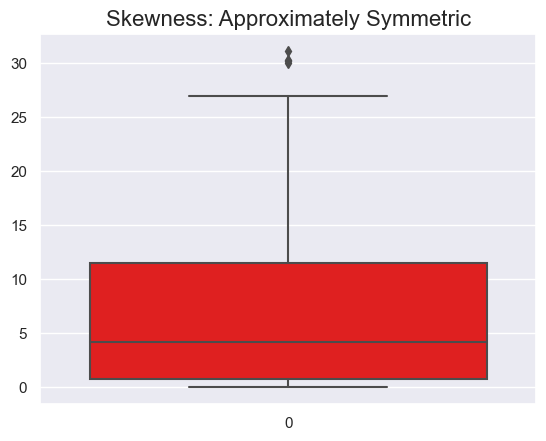

In [55]:
# Create a boxplot
ax = sns.boxplot(dataset['FWI'], color='red')

# Find the median
FWI_median = dataset_descriptive_summary['50%']['FWI']
print("Median:", FWI_median)

# Find the quartiles
FWI_q1 = dataset_descriptive_summary['25%']['FWI']
FWI_q3 = (dataset_descriptive_summary['75%']['FWI'])
print("Q1 (25th percentile):", FWI_q1)
print("Q3 (75th percentile):", FWI_q3)

# Calculate the IQR (Interquartile Range)
FWI_iqr = FWI_q3 - FWI_q1
print("IQR (Interquartile Range):", FWI_iqr)

# Detect and count outliers
FWI_lower_bound = FWI_q1 - 1.5 * FWI_iqr
FWI_upper_bound = FWI_q3 + 1.5 * FWI_iqr
FWI_outliers = dataset[(dataset['FWI'] < FWI_lower_bound) | (dataset['FWI'] > FWI_upper_bound)]
num_outliers = len(FWI_outliers)
print("Number of Outliers:", num_outliers)

# Assess skewness
if FWI_median < FWI_q1:
    skewness = "Skewed Right (Positive Skew)"
elif FWI_median > FWI_q3:
    skewness = "Skewed Left (Negative Skew)"
else:
    skewness = "Approximately Symmetric"

## ax.annotate(f'Skewness: {skewness}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

# Set the skewness as the plot title
plt.title(f'Skewness: {skewness}', fontsize=16)

# Display the plot
plt.show()

#### **`05`. countplot :**

  -  **Monthwise Fire Analysis of `'Bejaia Region Dataset'` and `'Sidi-Bel Abbes Region Dataset'`**



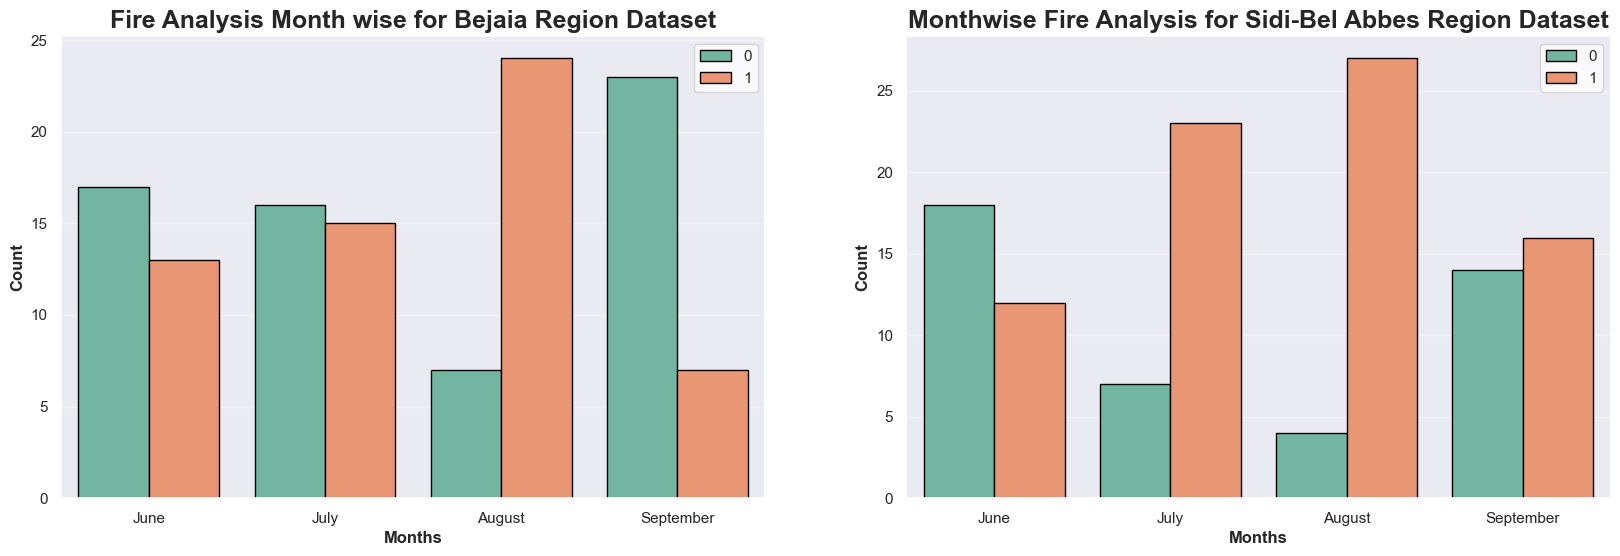

In [56]:
Bejaia_Region = dataset.loc[dataset['Region'] == 1]

dataset_month_name = []
for m in dataset['month'].unique():
    # Get the month name
    month_name = calendar.month_name[m]
    dataset_month_name.append(month_name)


plt.subplots(1,2,figsize=(20,6))
sns.set_style('whitegrid')
plt.subplot(121)
sns.countplot(x='month',hue='Classes',data= Bejaia_Region,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region Dataset', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), dataset_month_name)
plt.grid(alpha = 0.5,axis = 'y')



Sidi_Bel_Abbes_Region = dataset.loc[dataset['Region'] == 2]

sns.set_style('whitegrid')
plt.subplot(122)
sns.countplot(x='month',hue='Classes',data= Sidi_Bel_Abbes_Region,ec = 'black', palette= 'Set2')
plt.title('Monthwise Fire Analysis for Sidi-Bel Abbes Region Dataset', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), dataset_month_name)
plt.grid(alpha = 0.5,axis = 'y')

plt.show()

#### **`06`. Barchart :**

-  **Define barchart function for all the Features on the basis of Target Column "`Classes`"**

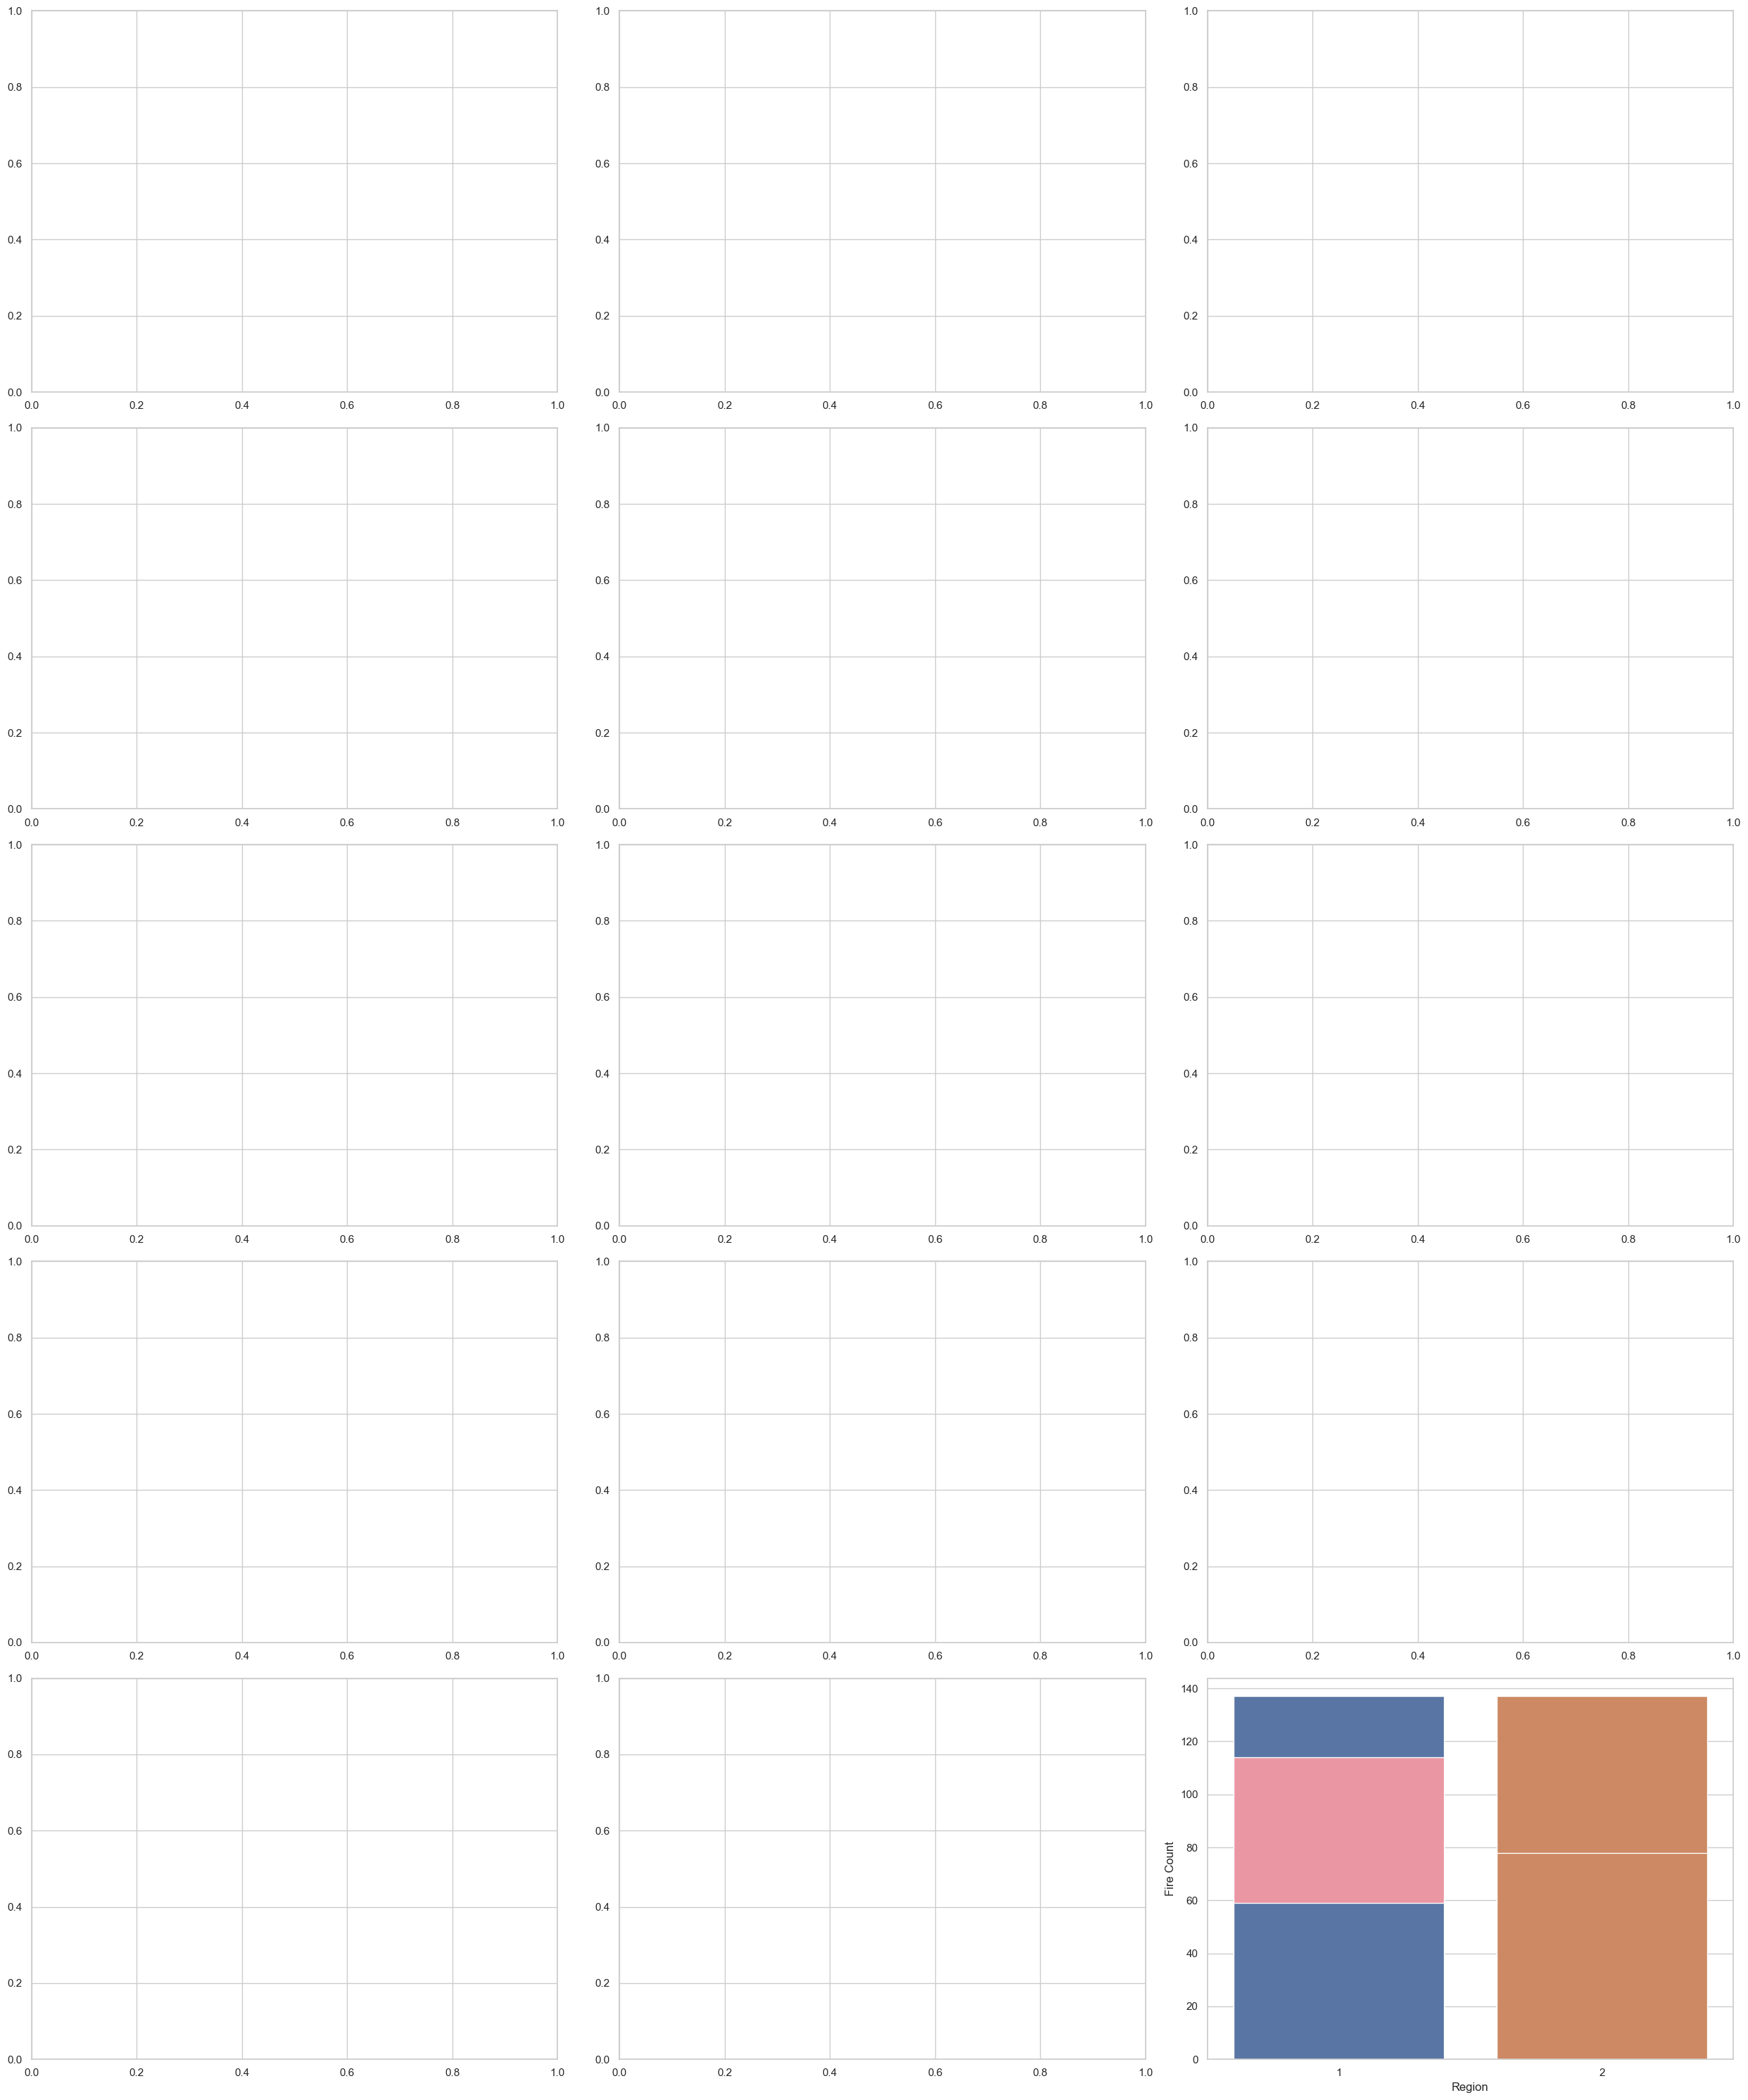

None


In [57]:
def barchart():
    num_rows = 5
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))
    axes = axes.flatten()
    
    for i, feature in zip(range(len(dataset.columns)),dataset.columns):
        by_feature =  dataset.groupby([feature], as_index=False)['Classes'].sum()
        ax = axes[i]
        ax = sns.barplot(x=feature, y="Classes", data=by_feature, estimator=sum)
        ax.set_xlabel(feature)
        ax.set_ylabel('Fire Count')
    plt.tight_layout()
    plt.show()


Bar_plot = barchart()
print(Bar_plot)